In [1]:
import glob
import os
import sys
from pathlib import Path

import numpy as np
import torch

# 当前目录
current_dir = os.path.dirname(os.path.abspath("__file__"))
# 上一级目录
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(parent_dir)
# 上两级目录
grandparent_dir = os.path.abspath(os.path.join(parent_dir, ".."))
sys.path.append(grandparent_dir)

from config_plot import *
from data import get_data
from network import PINN
from utils import (
    Logger,
    count_parameters,
    from_pickle,
    load_network,
    read_config_file,
    set_random_seed,
    tensors_to_numpy,
    to_pickle,
)

In [2]:
import scipy.io

# config

In [3]:
######################################################################
#
# env config
#
######################################################################
# Env
set_random_seed(random_seed=0)
os.makedirs(output_dir, exist_ok=True)

# Logger
logger = Logger(output_dir)

# Config
config_file_path = (
    "/home/lbu/project/pinn_vibration/ex_1D_longitudinal_vibration/config.py"
)
config = read_config_file(config_file_path)

# function

In [4]:
def get_analytical_solution(t, x):
    u = np.sin(np.pi * x) * np.cos(np.pi**2 * t)
    return u

# infer

In [5]:
x = np.linspace(0, 1, 100)
t = np.linspace(0, 1, 100)
X, T = np.meshgrid(x, t)
analytical_solution = get_analytical_solution(T, X)
analytical_solution.shape

(100, 100)

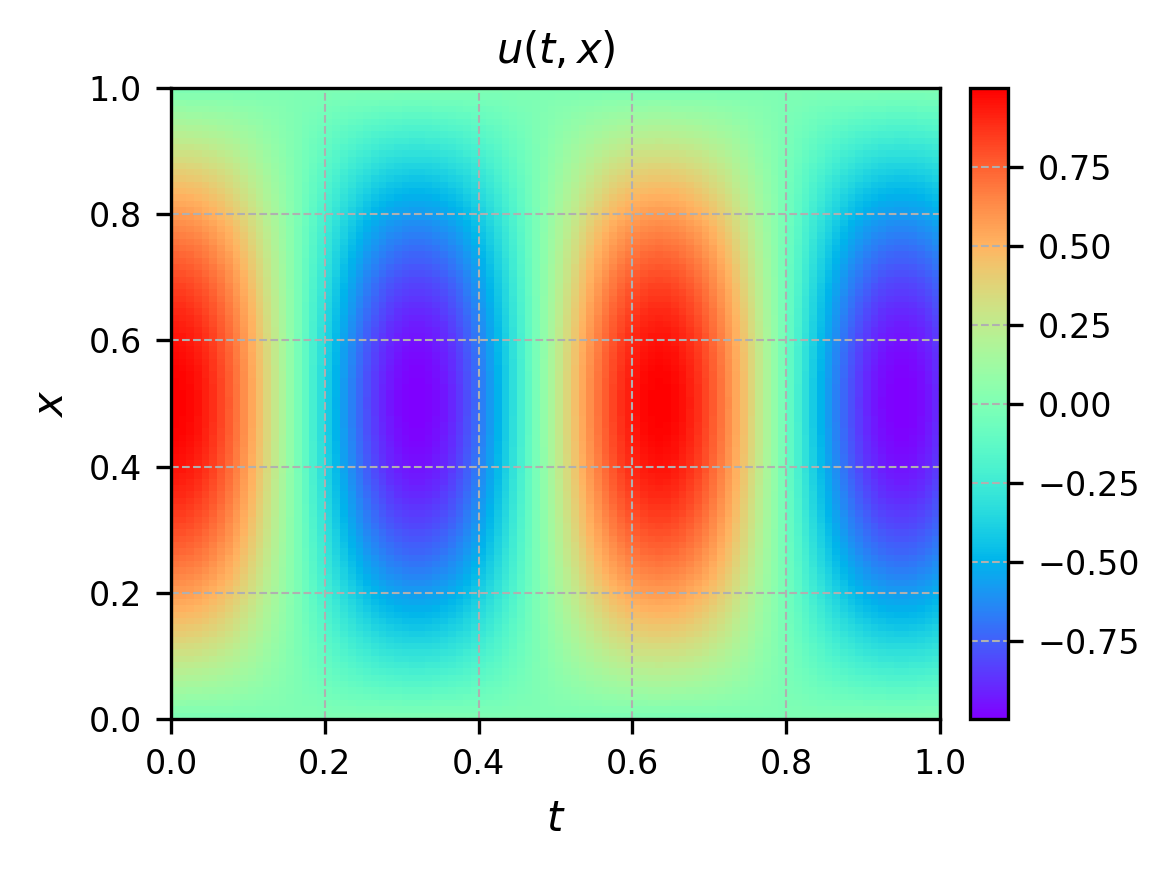

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(4 * 1, 3 * 1), dpi=Latex_DPI)
subfig = axs
subfig.set_title("$u(t,x)$")
subfig.set_xlabel("$t$")
subfig.set_ylabel("$x$")
h = subfig.imshow(
    analytical_solution.T,
    interpolation="nearest",
    cmap="rainbow",
    extent=[t.min(), t.max(), x.min(), x.max()],
    origin="lower",
    aspect="auto",
)
divider = make_axes_locatable(subfig)
cax = divider.append_axes("right", size="5%", pad=0.10)
cbar = fig.colorbar(h, cax=cax)
subfig.tick_params()

plt.tight_layout()

path = os.path.join(output_dir, "GT.png")
plt.savefig(path)

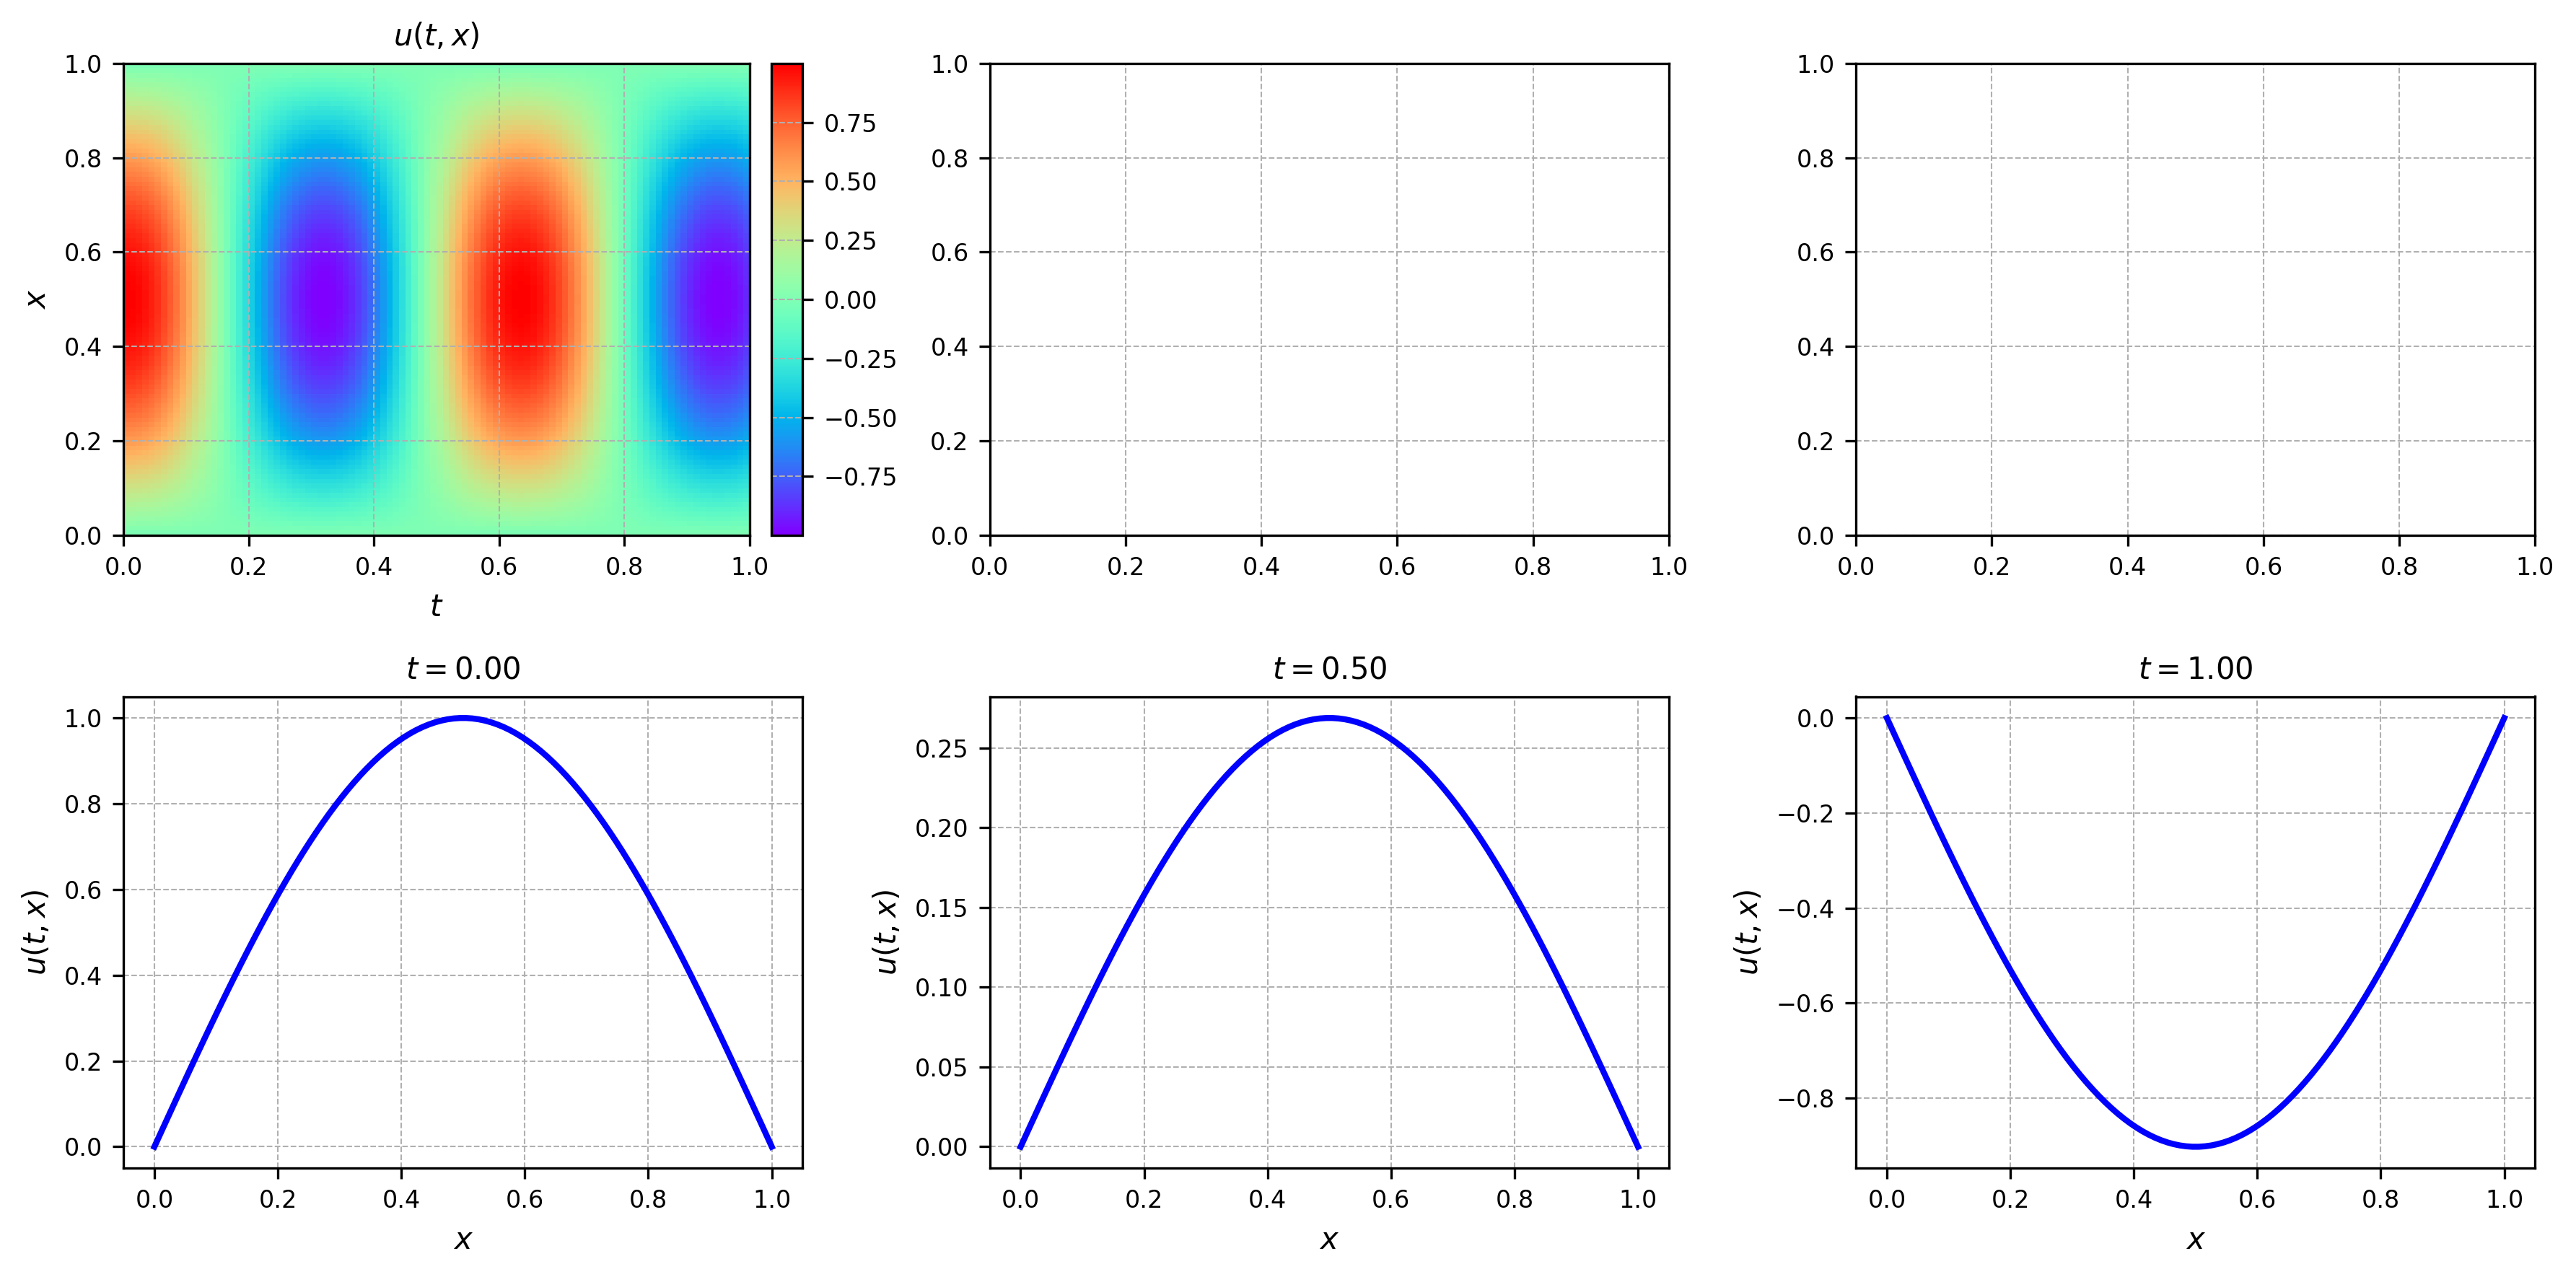

In [7]:
# plot
fig, axs = plt.subplots(2, 3, figsize=(4 * 3, 3 * 2), dpi=Latex_DPI)

subfig = axs[0, 0]
subfig.set_title("$u(t,x)$")
subfig.set_xlabel("$t$")
subfig.set_ylabel("$x$")
h = subfig.imshow(
    analytical_solution.T,
    interpolation="nearest",
    cmap="rainbow",
    extent=[t.min(), t.max(), x.min(), x.max()],
    origin="lower",
    aspect="auto",
)
divider = make_axes_locatable(subfig)
cax = divider.append_axes("right", size="5%", pad=0.10)
cbar = fig.colorbar(h, cax=cax)
subfig.tick_params()

subfig = axs[1, 0]
subfig.set_title("$t=0.00$")
subfig.set_xlabel("$x$")
subfig.set_ylabel("$u(t,x)$")
subfig.plot(x, analytical_solution[0, :], "b-", linewidth=2, label="Exact")

subfig = axs[1, 1]
subfig.set_title("$t=0.50$")
subfig.set_xlabel("$x$")
subfig.set_ylabel("$u(t,x)$")
subfig.plot(x, analytical_solution[50, :], "b-", linewidth=2, label="Exact")

subfig = axs[1, 2]
subfig.set_title("$t=1.00$")
subfig.set_xlabel("$x$")
subfig.set_ylabel("$u(t,x)$")
subfig.plot(x, analytical_solution[-1, :], "b-", linewidth=2, label="Exact")

plt.tight_layout()

path = os.path.join(output_dir, "1D_longitudinal_vibration.png")
plt.savefig(path)

In [8]:
data = {"t": t, "x": x, "usol": analytical_solution.T}
path = os.path.join(output_dir, "data_1D_lateral_vibration.pkl")
to_pickle(data, path)